In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//dell//Desktop//datasets//housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
# There are 10 columns 
# Objective - Predict the pricing of houses
# The output column(median_house_value) is continuous numerical data hence it is a regression problem

In [6]:
# Hypothesis Testing

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# dropping the null rows as it is only 1 percent of the dataset
df.dropna(inplace=True)

In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [11]:
# There is a huge correlation between median_house_income and median_income

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

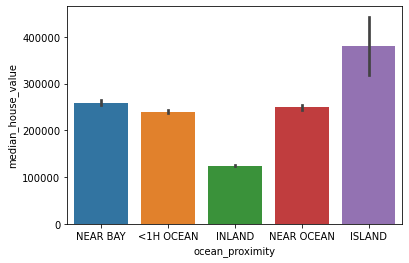

In [12]:
# Visual analysis pf variables
sns.barplot(x="ocean_proximity",y="median_house_value", data=df)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

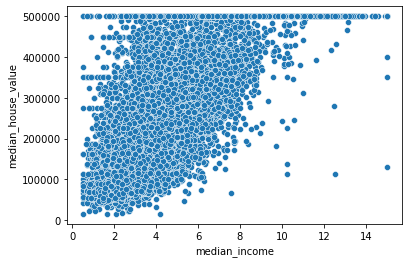

In [13]:
sns.scatterplot(x="median_income",y="median_house_value", data=df)

In [14]:
#one hot encoding
df=pd.get_dummies(df,drop_first=True)

In [15]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [16]:
x=df.drop("median_house_value",axis=1)

In [17]:
y=df[["median_house_value"]]

In [18]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [20]:
'''Linear Regression Model'''

'Linear Regression Model'

In [21]:
# Scale the Data using standard scaling
from sklearn.preprocessing import StandardScaler

In [22]:
scalar=StandardScaler()
x_train_s=scalar.fit_transform(x_train)
x_test_s=scalar.transform(x_test)

In [23]:
# Implement the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_s,y_train)
y_pred = model.predict(x_test_s)

In [24]:
# To check the accuracy
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,y_pred)

4802173538.60416

In [25]:
r2_score(y_test,y_pred)

0.6488402154431994

In [27]:
# Using Voting Ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [28]:
estimators_list = [("KNN",KNeighborsRegressor(n_neighbors=7)),("LR",LinearRegression()),("DT",DecisionTreeRegressor(max_depth=4)),("RF",RandomForestRegressor(max_depth=4))]

In [30]:
estimators_list

[('KNN', KNeighborsRegressor(n_neighbors=7)),
 ('LR', LinearRegression()),
 ('DT', DecisionTreeRegressor(max_depth=4)),
 ('RF', RandomForestRegressor(max_depth=4))]

In [31]:
model = VotingRegressor(estimators = estimators_list)

In [32]:
model.fit(x_train_s,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('KNN', KNeighborsRegressor(n_neighbors=7)),
                            ('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=4)),
                            ('RF', RandomForestRegressor(max_depth=4))])

In [33]:
ypred_2 = model.predict(x_test_s)

In [35]:
# Checking Accuracy
mean_squared_error(y_test,ypred_2)

4283513227.396185

In [36]:
r2_score(y_test, ypred_2)

0.6867673419157874